# Exercise 3 - EDA
In this part, we're going to analyze our input data in order to better understand it.

# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from graphing import graph_histogram, graph_pie
from utils import pairs_dev_to_filenames
import cv2
import pandas as pd

%matplotlib inline

# 1. Loading the Data

we see that `data/full_dataset` contains many folders, one for each class. each image is a `.jpg` file

In [2]:
dataset_rel_path = '../../data/full_dataset'
labels = os.listdir(dataset_rel_path)
paths = [dataset_rel_path + '/' + label for label in labels]
print()
files = [glob.glob(path + '/*.jpg', recursive=True) for path in paths]


Let's see the number of classes:

In [3]:
print(f"number of classes: {len(labels)}")

number of classes: 5749


We also could see some classes have only one image, while others have more. Let's see the number of samples per class:

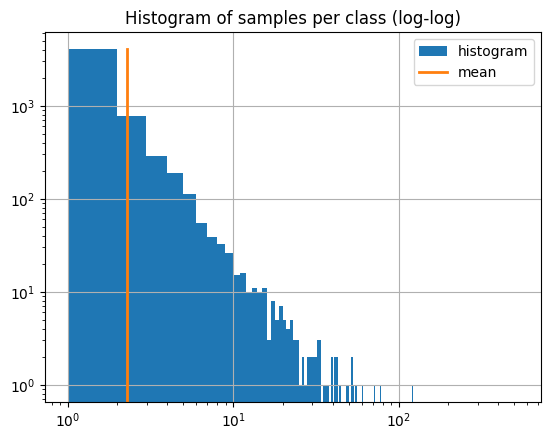

In [4]:
samples_per_class = np.array([len(file) for file in files])
spc_mu, spc_sigma, _, _ = graph_histogram(samples_per_class, 530, show_max=False, show_gaussian_fit=False, is_log_x=True, is_log_y=True, show_std=False, title='Histogram of samples per class (log-log)')

In [5]:
print(f'mean: {np.round(spc_mu, 3)}, std: {np.round(spc_sigma, 3)}')
print(f"number of samples in first 10 classes: {samples_per_class[:10]}")
print(f"lowest number of samples per class: {np.min(samples_per_class)}")
print(f"highest number of samples per class: {np.max(samples_per_class)}")
print(f"total number of samples: {np.sum(samples_per_class)}")

mean: 2.302, std: 9.016
number of samples in first 10 classes: [1 2 3 1 6 1 1 1 1 1]
lowest number of samples per class: 1
highest number of samples per class: 530
total number of samples: 13233


We see that some classes have as much as 530 (!) samples. Let's load all images:

In [6]:
input_paths = []
input_labels = []

for i, file in enumerate(files):
    input_paths.extend(file)
    input_labels.extend(len(file) * [labels[i]])

assert len(input_paths) == len(input_labels)
assert len(input_paths) == np.sum(samples_per_class)

print(f'first 10 paths:\n {input_paths[:10]}\n')
print(f'first 10 labels:\n {input_labels[:10]}')

first 10 paths:
 ['../../data/full_dataset/Peter_Hollingworth/Peter_Hollingworth_0001.jpg', '../../data/full_dataset/Michelle_Branch/Michelle_Branch_0001.jpg', '../../data/full_dataset/Michelle_Branch/Michelle_Branch_0002.jpg', '../../data/full_dataset/Jayson_Williams/Jayson_Williams_0001.jpg', '../../data/full_dataset/Jayson_Williams/Jayson_Williams_0003.jpg', '../../data/full_dataset/Jayson_Williams/Jayson_Williams_0002.jpg', '../../data/full_dataset/Jeanette_Stauffer/Jeanette_Stauffer_0001.jpg', '../../data/full_dataset/Leonid_Kuchma/Leonid_Kuchma_0003.jpg', '../../data/full_dataset/Leonid_Kuchma/Leonid_Kuchma_0001.jpg', '../../data/full_dataset/Leonid_Kuchma/Leonid_Kuchma_0006.jpg']

first 10 labels:
 ['Peter_Hollingworth', 'Michelle_Branch', 'Michelle_Branch', 'Jayson_Williams', 'Jayson_Williams', 'Jayson_Williams', 'Jeanette_Stauffer', 'Leonid_Kuchma', 'Leonid_Kuchma', 'Leonid_Kuchma']


Great! We've successfuly flattened the input arrays. now let's see a few of the pictures:

In [7]:
input_imgs = []
for path in input_paths[:3]:
    input_imgs.append(cv2.imread(path))

In [8]:
input_imgs[0].shape

(250, 250, 3)

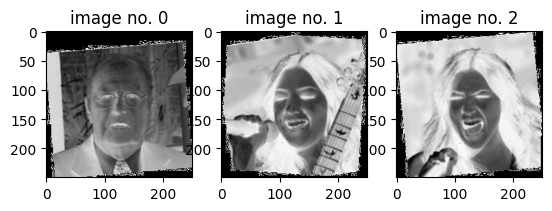

In [9]:


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
axes = [ax1, ax2, ax3]
for i in range(3):
    axes[i].set_title(f'image no. {i}')
    axes[i].imshow(1 - input_imgs[i])

We note that all images are of the size `(250,250,3)`, even though they all are greyscale. to save memory, we should transform these images into greyscale by taking their means.

## 1.1. Loadinng train and test sets

When opening the files `pairsDevTrain.txt` and `pairsDevTest.txt` in a text editor, we see the data is delimited by a tab

In [10]:
pairs_dev_train = []
pairs_dev_test = []

with open('../../data/set_pairs/raw_data/pairsDevTrain.txt', 'r') as file:
    for line in file:
        pairs_dev_train.append(line.strip().split('\t'))

with open('../../data/set_pairs/raw_data/pairsDevTest.txt', 'r') as file:
    for line in file:
        pairs_dev_test.append(line.strip().split('\t'))


We also see the columns having three possible length:

* The first row is of length 1, and just contains the number of the rest of the rows

In [11]:
print(pairs_dev_train[0])


['1100']


* Rows could have a length of 3. When that's the case, they're of the format `['person_name', idx_1, idx_2]`.
* This corresponds to when two images of the same class are being compared

In [12]:
table_lens_train = np.array([len(row) for row in pairs_dev_train])
table_lens_test = np.array([len(row) for row in pairs_dev_test])
print(pairs_dev_train[np.where(table_lens_train == 3)[0][0]])


['Aaron_Peirsol', '1', '2']


* Rows could have a length of 4. When that's the case, they're of the format `['person_name_1', idx_1, 'person_name_2', idx_2]`.
* This corresponds to when two images of different classes are being compared

In [13]:
print(pairs_dev_train[np.where(table_lens_train == 4)[0][0]])

['AJ_Cook', '1', 'Marsha_Thomason', '1']


Let's see how many samples are same-class pair (len==3) or a different-class pair (len==4)

In [14]:
print(f"total samples in train set: {len(pairs_dev_train) - 1}\n")
print(f"total samples in test set: {len(pairs_dev_test) - 1}\n")

total samples in train set: 2200

total samples in test set: 1000



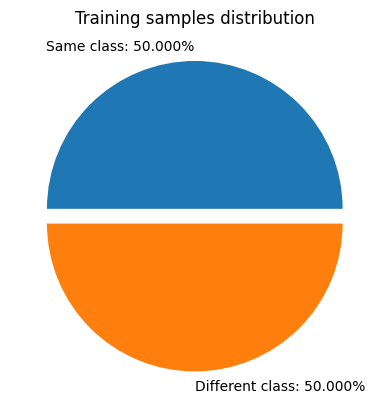

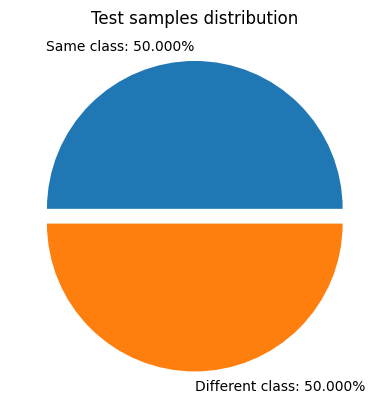

In [15]:
labels = ['Same class', 'Different class']
sizes_train = np.array([(table_lens_train == 3).sum(), (table_lens_train == 4).sum()], dtype=int)
sizes_test = np.array([(table_lens_test == 3).sum(), (table_lens_test == 4).sum()], dtype=int)

graph_pie(sizes_train, labels, "Training samples distribution")
graph_pie(sizes_test, labels, "Test samples distribution")

It seems that both Same-class and Different-class pairs appear at the same frequency in both sets.

In [16]:
train_filenames_1, train_classes_1, train_filenames_2, train_classes_2 = pairs_dev_to_filenames(pairs_dev_train)
test_filenames_1, test_classes_1, test_filenames_2, test_classes_2 = pairs_dev_to_filenames(pairs_dev_test)

train_labels = (np.array(train_classes_1) == np.array(train_classes_2)).tolist()
test_labels = (np.array(test_classes_1) == np.array(test_classes_2)).tolist()


Having preprocessed the dev pairs to fit the file names, we can save the new data and move on with building the network!


In [17]:
import csv
list_files = ['filenames_1', 'classes_1', 'filenames_2', 'classes_2', 'labels']
lists_data = {
    'train': [train_filenames_1, train_classes_1, train_filenames_2, train_classes_2, train_labels],
    'test': [test_filenames_1, test_classes_1, test_filenames_2, test_classes_2, test_labels]
}
for type in ['train', 'test']:
    for i in range(len(list_files)):
        df = pd.DataFrame({'data': lists_data[type][i]})
        df.to_csv(f'../../data/set_pairs/processed_data/{type}/{list_files[i]}.txt', index=False)



In [18]:
with open(f'../../data/set_pairs/processed_data/train/filenames_1.txt', 'r', newline='') as file:
    ahhh = pd.read_csv(file, sep=',').values.squeeze().tolist()
